About this file
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

It specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

In [1]:
library(tidyverse)
library(magrittr)
library(plotly)
library(ggthemes)
library(knitr)
library(corrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


corrplot 0.84 loaded



In [2]:
africa_data <- read.csv2('../input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv', sep = ",", header = TRUE)

In [3]:
africa_data %>% head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>
1,1,DZA,Algeria,1870,1,0.052264,0,0,0,3.441455696,0,0,0,crisis
2,1,DZA,Algeria,1871,0,0.052798,0,0,0,14.14913958,0,0,0,no_crisis
3,1,DZA,Algeria,1872,0,0.052274,0,0,0,-3.718592965,0,0,0,no_crisis
4,1,DZA,Algeria,1873,0,0.05168,0,0,0,11.20389701,0,0,0,no_crisis
5,1,DZA,Algeria,1874,0,0.051308,0,0,0,-3.848560701,0,0,0,no_crisis
6,1,DZA,Algeria,1875,0,0.051546,0,0,0,-20.92417833,0,0,0,no_crisis


# 1. Numbers of annual observations by the country
* Egypt has 155 observations available.
* South Africa has 114 observations.
* Lastly, the Central African Republic has only 58 observations.


In [4]:
numbers_observations_country <- africa_data %>% 
mutate(n = 1) %>% 
group_by(country) %>%
summarise(total = sum(n)) %>% 
arrange(desc(total))

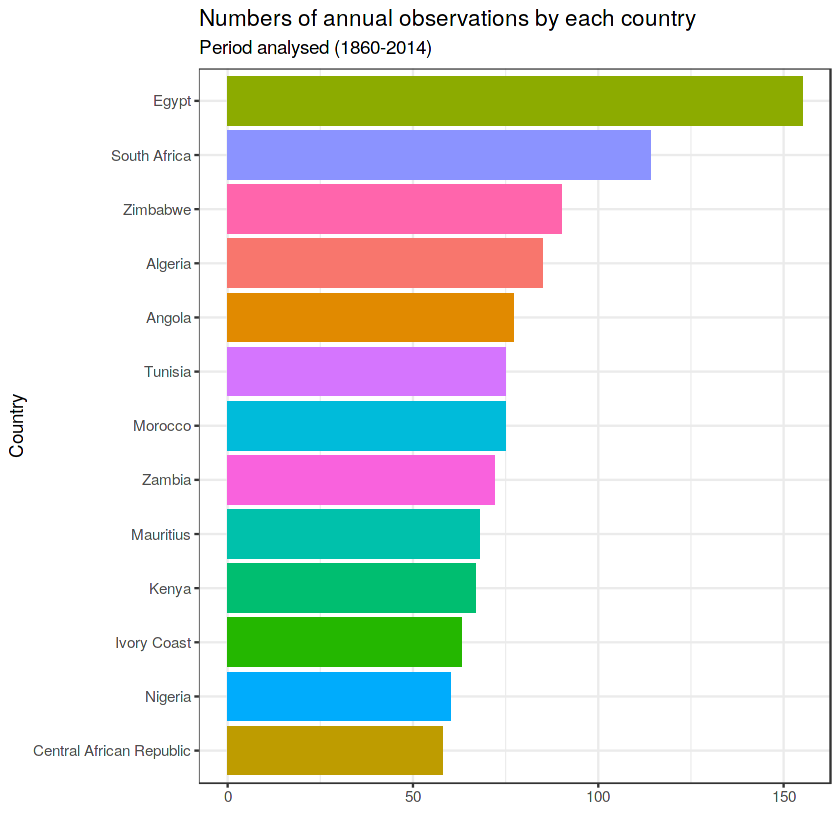

In [5]:
numbers_observations_country %>% 
ggplot(aes(x = reorder(country, +total), y = total, fill = country)) + geom_col() +
theme_bw() + theme(legend.position="none") +
labs(x = 'Country', y = '',
     title = 'Numbers of annual observations by each country',
     subtitle = 'Period analysed (1860-2014)') +
coord_flip()

# 2. Africans countries independence
* It's worth mentioning that after World War II, more specifically between the 1950s and 1960s, there was a transition from colonial governments to independent states.
* This can be seen from the observed data. Angola was the last country on the list to achieve its independence and Algeria the second to last. 

In [6]:
africa_data %>% 
dplyr::select(country, year, independence) %>% 
dplyr::filter(independence == 1) %>% 
group_by(country) %>% 
slice(1) %>% 
dplyr::select(-independence) %>% 
arrange(desc(year)) %>% 
kable()



|country                  | year|
|:------------------------|----:|
|Angola                   | 1975|
|Algeria                  | 1968|
|Zimbabwe                 | 1965|
|Zambia                   | 1964|
|Kenya                    | 1963|
|Mauritius                | 1963|
|Central African Republic | 1960|
|Ivory Coast              | 1960|
|Nigeria                  | 1960|
|Morocco                  | 1956|
|Tunisia                  | 1956|
|South Africa             | 1910|
|Egypt                    | 1860|

# 3. Domestic debt in default by the country
* Zimbabwe and Angola were the only countries that had presented domestic debt in default on 30 and 12 years, respectively.

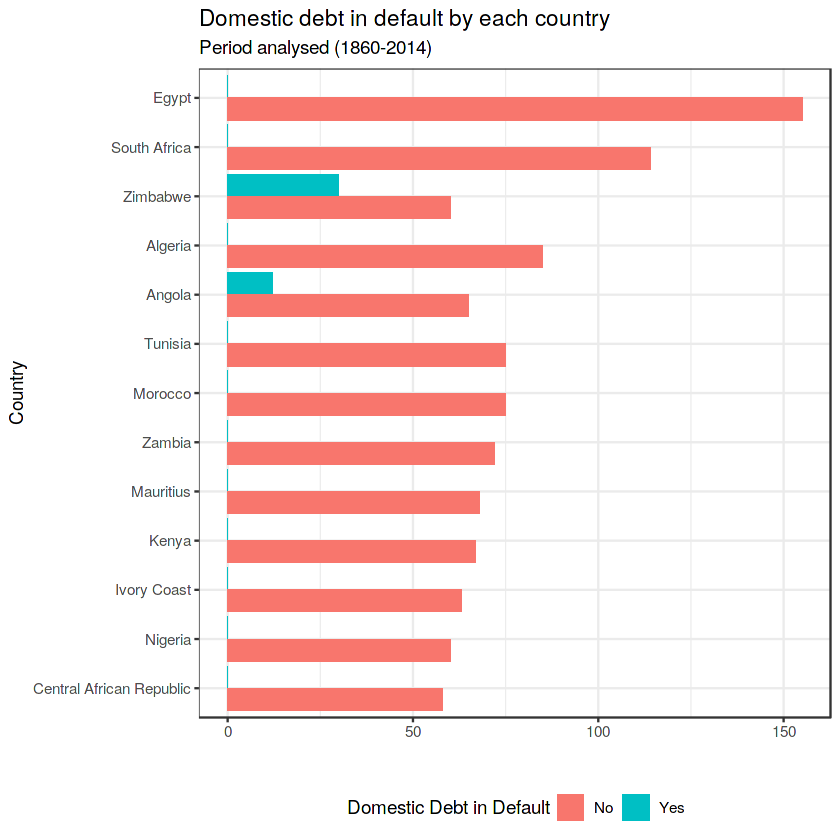

In [7]:
africa_data %>% 
mutate(domestic_debt_in_default = ifelse(domestic_debt_in_default == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(domestic_debt_in_default) %>% 
spread(domestic_debt_in_default, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('no', 'yes', key = 'domestic_debt_in_default', value = "cases") %>% 
data.frame() %>% 
ggplot(aes(x = reorder(country, + cases), y = cases, fill = domestic_debt_in_default)) + geom_col(position = 'dodge') +
theme_bw() +
labs(x = 'Country', y = '',
     title = 'Domestic debt in default by each country',
     subtitle = 'Period analysed (1860-2014)') +
theme(legend.position="bottom") +
scale_fill_discrete(name = "Domestic Debt in Default", labels = c('No', 'Yes')) +
coord_flip()

# 4. Sovereign external debt default by the country
* Central African Republic, Zimbabwe and, Ivory Coast have defaulted on sovereign external debt for 33, 30 and 29 years, respectively.
* Mauritius was the only country that never defaulted.

In [8]:
africa_data %>% 
mutate(sovereign_external_debt_default = ifelse(sovereign_external_debt_default == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(sovereign_external_debt_default) %>% 
spread(sovereign_external_debt_default, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('no', 'yes', key = 'sovereign_external_debt_default', value = "cases")  %>% 
arrange(desc(cases)) %>% 
kable()



|country                  |sovereign_external_debt_default | cases|
|:------------------------|:-------------------------------|-----:|
|Egypt                    |no                              |   149|
|South Africa             |no                              |   109|
|Algeria                  |no                              |    79|
|Morocco                  |no                              |    69|
|Mauritius                |no                              |    68|
|Tunisia                  |no                              |    68|
|Angola                   |no                              |    64|
|Kenya                    |no                              |    61|
|Zambia                   |no                              |    60|
|Zimbabwe                 |no                              |    60|
|Nigeria                  |no                              |    51|
|Ivory Coast              |no                              |    34|
|Central African Republic |yes                

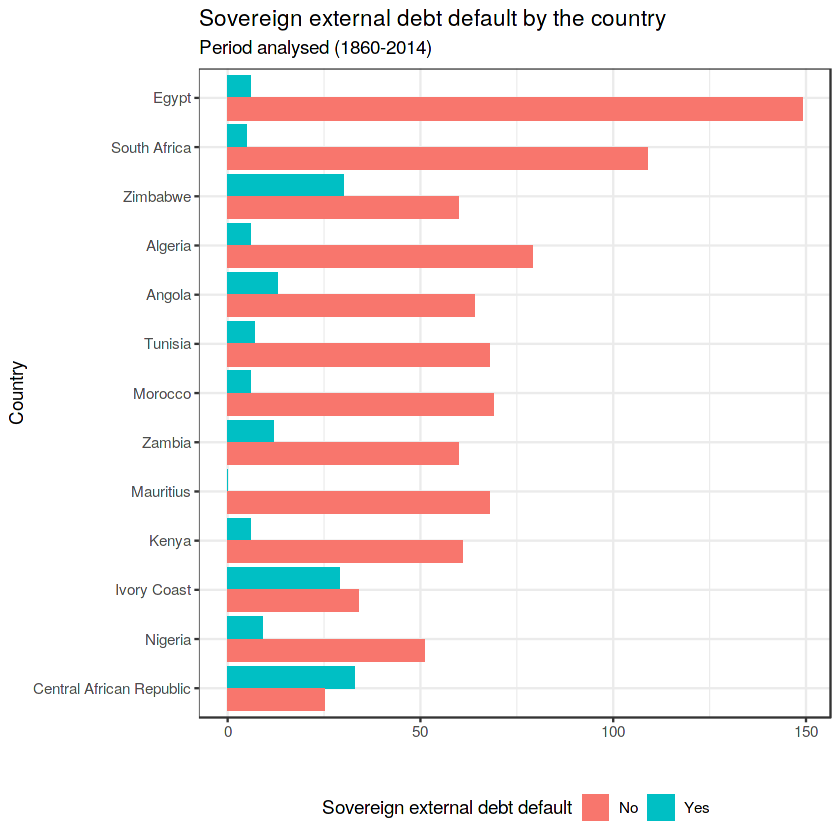

In [9]:
africa_data %>% 
mutate(sovereign_external_debt_default = ifelse(sovereign_external_debt_default == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(sovereign_external_debt_default) %>% 
spread(sovereign_external_debt_default, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('no', 'yes', key = 'sovereign_external_debt_default', value = "cases") %>% 
data.frame() %>% 
ggplot(aes(x = reorder(country, + cases), y = cases, fill = sovereign_external_debt_default)) + geom_col(position = 'dodge') +
theme_bw() +
labs(x = 'Country', y = '',
     title = 'Sovereign external debt default by the country',
     subtitle = 'Period analysed (1860-2014)') +
theme(legend.position="bottom") +
scale_fill_discrete(name = "Sovereign external debt default", labels = c('No', 'Yes')) +
coord_flip()

# 5. Gross domestic product weighted default by the country
Algeria, Egypt, Morocco, South Africa, and Tunisia were the only available countries with a GDP weighted default different of zero.

* Egypt (1876-1980, 1984) - 40%
* South Africa (1985-1993) - 36%
* Algeria (1992-1996) - 23%
* Morocco (1983-1990) - 13%
* Tunisia (1956,58,63,79,80-82) - 6%

In [10]:
africa_data %>% 
mutate(gdp_weighted_default = as.numeric(as.character(gdp_weighted_default))) %>% 
dplyr::select(country, year, gdp_weighted_default)  %>% 
rename(Country = country) %>% 
dplyr::filter(gdp_weighted_default != 0) %>% 
arrange(desc(gdp_weighted_default)) %>% 
kable()



|Country      | year| gdp_weighted_default|
|:------------|----:|--------------------:|
|Egypt        | 1876|                 0.40|
|Egypt        | 1877|                 0.40|
|Egypt        | 1878|                 0.40|
|Egypt        | 1879|                 0.40|
|Egypt        | 1880|                 0.40|
|Egypt        | 1984|                 0.40|
|South Africa | 1985|                 0.36|
|South Africa | 1986|                 0.36|
|South Africa | 1987|                 0.36|
|South Africa | 1989|                 0.36|
|South Africa | 1993|                 0.36|
|Algeria      | 1991|                 0.23|
|Algeria      | 1992|                 0.23|
|Algeria      | 1993|                 0.23|
|Algeria      | 1994|                 0.23|
|Algeria      | 1995|                 0.23|
|Algeria      | 1996|                 0.23|
|Morocco      | 1983|                 0.13|
|Morocco      | 1986|                 0.13|
|Morocco      | 1987|                 0.13|
|Morocco      | 1988|         

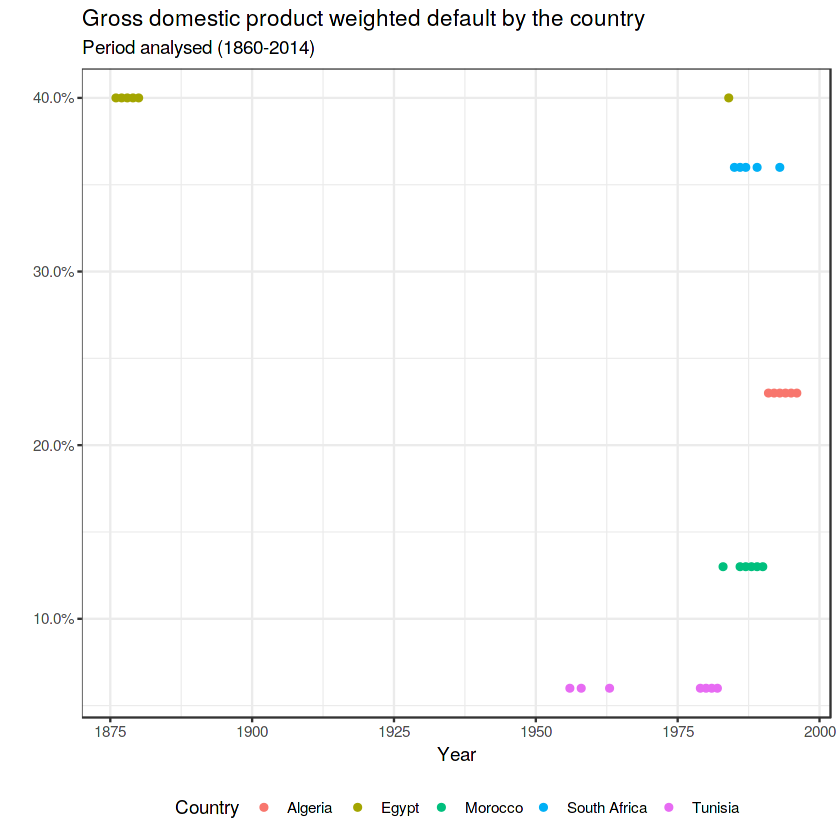

In [11]:
africa_data %>% 
mutate(gdp_weighted_default = as.numeric(as.character(gdp_weighted_default))) %>% 
dplyr::select(country, year, gdp_weighted_default)  %>% 
rename(Country = country) %>% 
dplyr::filter(gdp_weighted_default != 0) %>% 
arrange(desc(gdp_weighted_default))  %>% 
ggplot(aes(x = year, y = gdp_weighted_default, color = Country)) + geom_point() + 
scale_y_continuous(labels=scales::percent) +
theme_bw() +
labs(x = 'Year', y = '', 
     title = 'Gross domestic product weighted default by the country',
    subtitle = 'Period analysed (1860-2014)') +
theme(legend.position="bottom")


# 6. Numbers of systemic crisis by the country
* Central African Republic, Zimbabwe, Kenya, and Nigeria are among the four countries with the highest number of systemic crises, with 19, 15, 13 and 10, respectively.
* Angola, Mauritius and South Africa have never experienced a systemic crisis.

In [12]:
africa_data %>% 
mutate(systemic_crisis = ifelse(systemic_crisis == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(systemic_crisis) %>% 
spread(systemic_crisis, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('no', 'yes', key = 'systemic_crisis', value = "cases") %>% 
arrange(desc(cases)) %>% 
kable()



|country                  |systemic_crisis | cases|
|:------------------------|:---------------|-----:|
|Egypt                    |no              |   149|
|South Africa             |no              |   114|
|Algeria                  |no              |    81|
|Angola                   |no              |    77|
|Zimbabwe                 |no              |    75|
|Morocco                  |no              |    73|
|Tunisia                  |no              |    70|
|Mauritius                |no              |    68|
|Zambia                   |no              |    68|
|Ivory Coast              |no              |    59|
|Kenya                    |no              |    54|
|Nigeria                  |no              |    50|
|Central African Republic |no              |    39|
|Central African Republic |yes             |    19|
|Zimbabwe                 |yes             |    15|
|Kenya                    |yes             |    13|
|Nigeria                  |yes             |    10|
|Egypt    

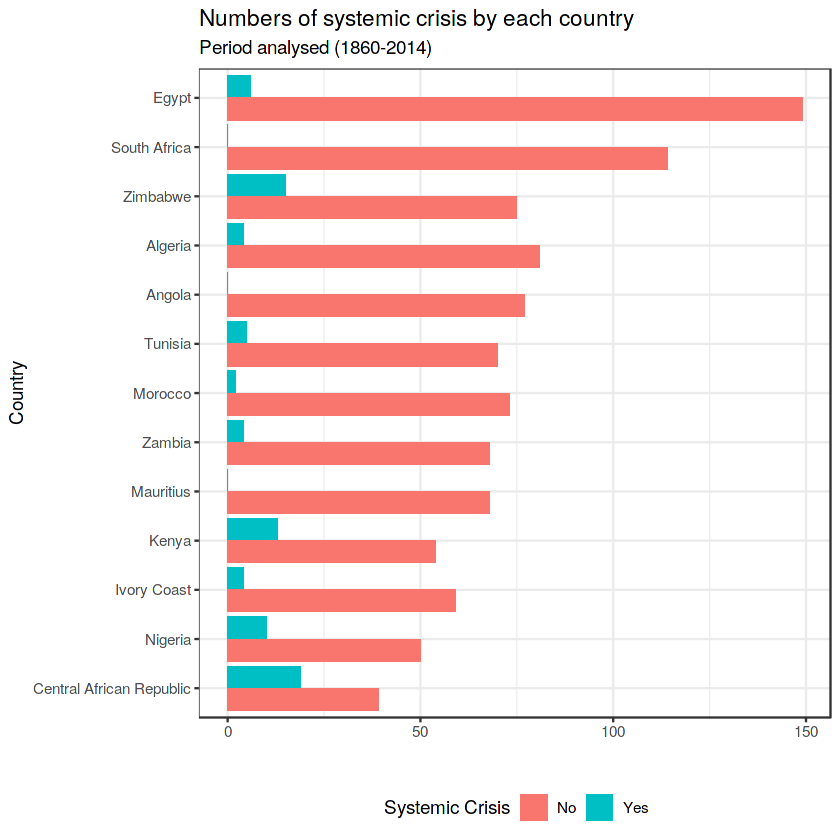

In [13]:
africa_data %>% 
mutate(systemic_crisis = ifelse(systemic_crisis == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(systemic_crisis) %>% 
spread(systemic_crisis, n) %>% 
mutate(yes = ifelse(is.na(yes), 0, yes)) %>% 
gather('no', 'yes', key = 'systemic_crisis', value = "cases") %>% 
data.frame() %>% 
ggplot(aes(x = reorder(country, +cases), y = cases, fill = systemic_crisis)) + geom_col(position = 'dodge') +
theme_bw() +
labs(x = 'Country', y = '',
     title = 'Numbers of systemic crisis by each country',
     subtitle = 'Period analysed (1860-2014)') +
theme(legend.position="bottom") +
scale_fill_discrete(name = "Systemic Crisis", labels = c('No', 'Yes')) +
coord_flip()

# 7. Numbers of banking crisis by the country
Remembering that countries have different independence dates. So we will use the percentage concept to measure how long countries have faced a banking crisis.
* The central African Republic, Nigeria, and Zimbabwe have faced the largest banking crises in African countries for longer.
* Morocco, South Africa, and Mauritius have faced banking crises for a shorter time.

In [14]:
africa_data %>% 
group_by(country, banking_crisis) %>% 
count() %>% 
spread(banking_crisis, n) %>% 
mutate(percentual_banking_crisis = round(crisis/(crisis + no_crisis),2)) %>% 
arrange(desc(percentual_banking_crisis)) %>% 
kable()



|country                  | crisis| no_crisis| percentual_banking_crisis|
|:------------------------|------:|---------:|-------------------------:|
|Central African Republic |     19|        39|                      0.33|
|Nigeria                  |     11|        49|                      0.18|
|Zimbabwe                 |     15|        75|                      0.17|
|Kenya                    |      8|        59|                      0.12|
|Angola                   |      7|        70|                      0.09|
|Egypt                    |     11|       144|                      0.07|
|Tunisia                  |      5|        70|                      0.07|
|Ivory Coast              |      4|        59|                      0.06|
|Zambia                   |      4|        68|                      0.06|
|Algeria                  |      4|        81|                      0.05|
|Morocco                  |      2|        73|                      0.03|
|South Africa             |      3| 

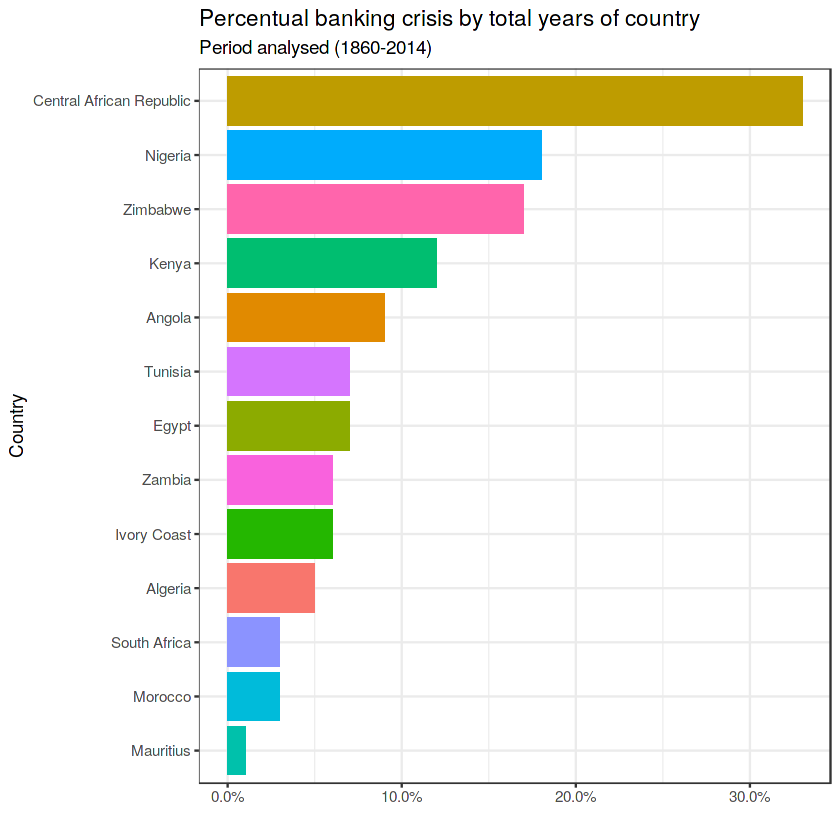

In [15]:
africa_data %>% 
group_by(country, banking_crisis) %>% 
count() %>% 
spread(banking_crisis, n) %>% 
mutate(percentual_banking_crisis = round(crisis/(crisis + no_crisis),2)) %>% 
ggplot(aes(x = reorder(country, +percentual_banking_crisis), y = percentual_banking_crisis, fill = country)) + geom_col() +
scale_y_continuous(labels=scales::percent) + theme_bw() + theme(legend.position="none") +
labs(x = 'Country', y = '', 
     title = 'Percentual banking crisis by total years of country',
    subtitle = 'Period analysed (1860-2014)') +
coord_flip()

# 8. The median exchange rate of the country vis-a-vis the USD
* The Central African Republic had the highest median and the highest maximum already registered exchange rate of the country vis-a-vis the USD.
* Ivory Coast appears with the second-highest maximum already registered.

In [16]:
africa_data %>% 
group_by(country) %>% 
mutate(exch_usd = as.numeric(as.character(exch_usd))) %>%
summarise(median_exch_usd = median(exch_usd),
         min_exch_usd = min(exch_usd),
         max_exch_usd = max(exch_usd)) %>%  
mutate(median_exch_usd = round(median_exch_usd,2),
       min_exch_usd = round(min_exch_usd,2),
       max_exch_usd = round(max_exch_usd,2)) %>% 
arrange(desc(median_exch_usd)) %>% 
kable()



|country                  | median_exch_usd| min_exch_usd| max_exch_usd|
|:------------------------|---------------:|------------:|------------:|
|Central African Republic |          288.40|       201.00|       744.31|
|Kenya                    |           10.29|         4.96|        89.35|
|Mauritius                |            9.08|         3.31|        34.34|
|Morocco                  |            5.04|         0.50|        11.56|
|Algeria                  |            4.38|         0.05|        87.97|
|Tunisia                  |            1.00|         0.39|       350.00|
|Nigeria                  |            0.78|         0.00|       158.27|
|South Africa             |            0.36|         0.19|        12.13|
|Egypt                    |            0.24|         0.19|         7.15|
|Angola                   |            0.00|         0.00|       101.49|
|Ivory Coast              |            0.00|         0.00|       616.00|
|Zambia                   |            0.00|     

# 9. Countries that have experienced long periods of high inflation

* Angola, Zambia, Zimbabwe, and Nigeria were the countries that faced the longest inflation.
* Meanwhile, Kenya, Central African Republican, and South Africa faced inflation for a shorter time.

In [17]:
africa_data %>% 
mutate(inflation_crises = ifelse(inflation_crises == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(inflation_crises) %>% 
spread(inflation_crises, n)  %>% 
mutate(percentual_inflation_crisis = yes/(yes+no)) %>% 
arrange(desc(percentual_inflation_crisis)) %>% 
kable()



|country                  |  no| yes| percentual_inflation_crisis|
|:------------------------|---:|---:|---------------------------:|
|Angola                   |  51|  26|                   0.3376623|
|Zambia                   |  52|  20|                   0.2777778|
|Zimbabwe                 |  71|  19|                   0.2111111|
|Nigeria                  |  48|  12|                   0.2000000|
|Algeria                  |  71|  14|                   0.1647059|
|Morocco                  |  65|  10|                   0.1333333|
|Tunisia                  |  67|   8|                   0.1066667|
|Mauritius                |  62|   6|                   0.0882353|
|Egypt                    | 144|  11|                   0.0709677|
|Ivory Coast              |  59|   4|                   0.0634921|
|Kenya                    |  63|   4|                   0.0597015|
|Central African Republic |  56|   2|                   0.0344828|
|South Africa             | 113|   1|                   0.00

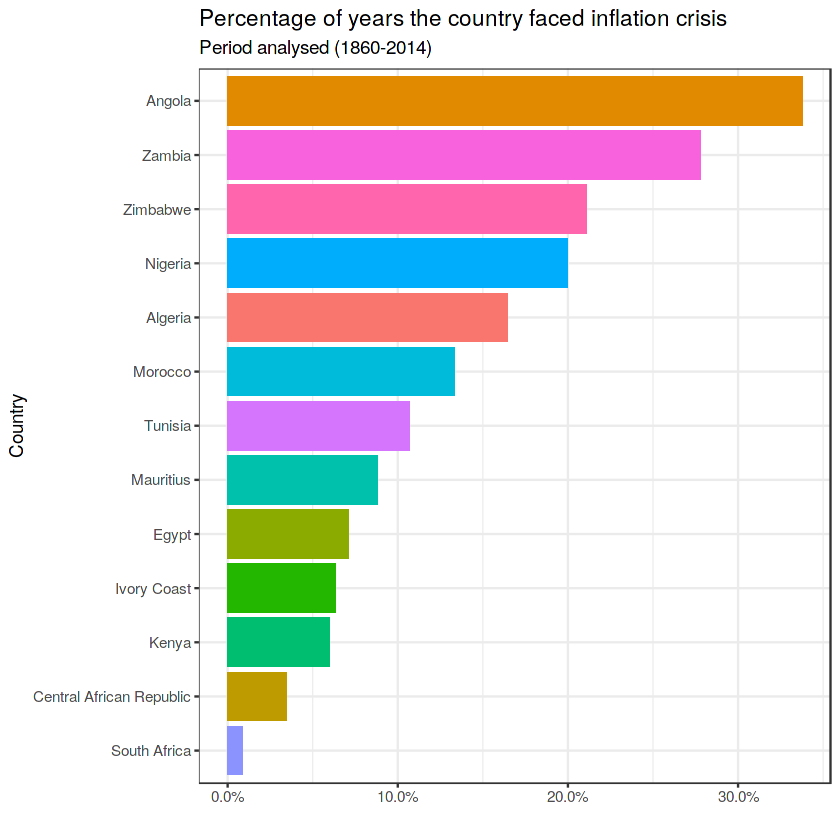

In [18]:
africa_data %>% 
mutate(inflation_crises = ifelse(inflation_crises == 1, 'yes', 'no')) %>% 
group_by(country) %>% 
count(inflation_crises) %>% 
spread(inflation_crises, n)  %>% 
mutate(percentual_inflation_crisis = yes/(yes+no)) %>% 
ggplot(aes(x = reorder(country, +percentual_inflation_crisis), y = percentual_inflation_crisis, fill = country)) + geom_col() +
scale_y_continuous(labels=scales::percent) + theme_bw() + theme(legend.position="none") +
labs(x = 'Country', y = '', title = 'Percentage of years the country faced inflation crisis',
    subtitle = 'Period analysed (1860-2014)') +
coord_flip()

# 10. The annual CPI Inflation rate by each country (median, minimum, maximun)
* Angola, Zambia, and Nigeria recorded the highest inflation rates among the 13 countries assessed.
* Tunisia had the highest median inflation rate, while Egypt had the lowest median rate.

In [19]:
table_inflation <- africa_data %>% 
mutate(inflation_annual_cpi = as.numeric(inflation_annual_cpi)) %>% 
group_by(country) %>% 
summarise(median_inflation_anual = median(inflation_annual_cpi),
         min_inflation_anual = min(inflation_annual_cpi),
         max_inflation_anual = max(inflation_annual_cpi)) %>% 
mutate(median_inflation_anual = round(median_inflation_anual,2),
       min_inflation_anual = round(min_inflation_anual,2),
       max_inflation_anual = round(max_inflation_anual,2)) %>% 
arrange(desc(median_inflation_anual))

table_inflation %>% 
kable()



|country                  | median_inflation_anual| min_inflation_anual| max_inflation_anual|
|:------------------------|----------------------:|-------------------:|-------------------:|
|Tunisia                  |                  684.0|                  16|                 983|
|Algeria                  |                  582.0|                  25|                1012|
|Zambia                   |                  559.5|                  12|                1021|
|Nigeria                  |                  544.5|                   1|                1019|
|Mauritius                |                  542.5|                   7|                1013|
|Kenya                    |                  532.0|                   2|                1018|
|Morocco                  |                  501.0|                   5|                1010|
|Zimbabwe                 |                  493.0|                  26|                1001|
|Ivory Coast              |                  468.0|       

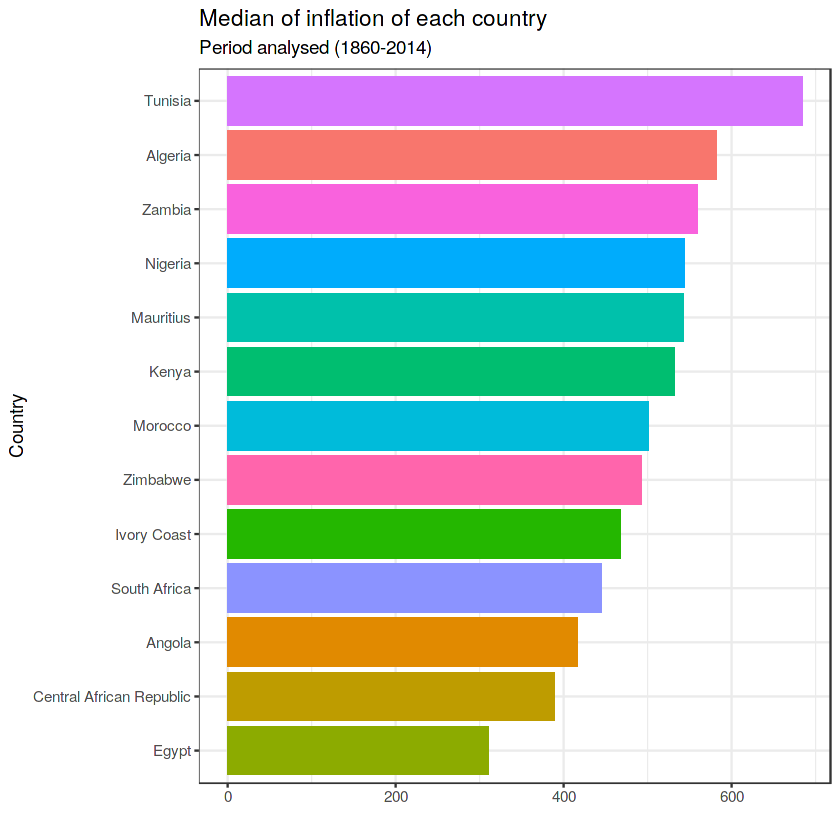

In [20]:
table_inflation %>% 
ggplot(aes(x = reorder(country, + median_inflation_anual), y = median_inflation_anual, fill = country)) + geom_col() +
theme_bw() + theme(legend.position="none") +
labs(x = 'Country', y = '', 
     title = 'Median of inflation of each country',
     subtitle = 'Period analysed (1860-2014)') + coord_flip()